In [49]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix, roc_auc_score, recall_score, precision_score


# Decision Trees

## 1. Explore

In [50]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")

#(ggplot(gpa, aes()) + geom_bar())

## 2. Build Model

In [51]:
X = gpa[["home","amount","cashBack"]]
y = gpa["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
zscore = StandardScaler()
zscore.fit(X_train[["amount"]])

X_train["amount"] = zscore.transform(X_train[["amount"]])
X_test["amount"] = zscore.transform(X_test[["amount"]])

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 3. Evaluate Model

In [52]:
print("TEST ACC : ", accuracy_score(y_test, tree.predict(X_test)))
print("TRAIN ACC: ", accuracy_score(y_train, tree.predict(X_train)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

TEST ACC :  0.875
TRAIN ACC:  1.0
TEST Precision :  0.9090909090909091
TRAIN Precision:  1.0
TEST Recall :  0.7142857142857143
TRAIN Recall:  1.0
TEST ROC/AUC :  0.8379120879120879
TRAIN ROC/AUC:  1.0


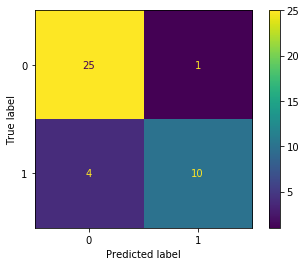

In [53]:
plot_confusion_matrix(tree,X_test,y_test)

## Max Depth

In [54]:
tree.get_depth()

9

In [55]:
tree.get_n_leaves()

34

In [56]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
print("TEST ACC : ", accuracy_score(y_test, tree.predict(X_test)))
print("TRAIN ACC: ", accuracy_score(y_train, tree.predict(X_train)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

TEST ACC :  0.825
TRAIN ACC:  0.9
TEST Precision :  0.7692307692307693
TRAIN Precision:  0.9069767441860465
TEST Recall :  0.7142857142857143
TRAIN Recall:  0.9069767441860465
TEST ROC/AUC :  0.8873626373626373
TRAIN ROC/AUC:  0.9533312382149591


In [58]:
tree.get_depth()

3

## Min Leaf Samples

In [59]:
tree = DecisionTreeClassifier(min_samples_leaf = 10)
tree.fit(X_train, y_train)

print("TEST ACC : ", accuracy_score(y_test, tree.predict(X_test)))
print("TRAIN ACC: ", accuracy_score(y_train, tree.predict(X_train)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

TEST ACC :  0.825
TRAIN ACC:  0.8875
TEST Precision :  0.7692307692307693
TRAIN Precision:  0.9146341463414634
TEST Recall :  0.7142857142857143
TRAIN Recall:  0.872093023255814
TEST ROC/AUC :  0.9065934065934067
TRAIN ROC/AUC:  0.9521527341294783


## Other Options
You can actually limit tree complexity in a few ways. We learned about `max_depth` and `min_samples_leaf`, but you can also choose how many samples need to be in an internal node for us to split (`min_samples_split`), limit the number of leaf nodes allowed (`max_leaf_nodes`), or require a split to reduce the impurity/entropy by *at least* a certain amount before allowing a split (`min_impurity_decrease`), and more!

The idea for all of them, though is to create a tree that is not overfit.

## Variable/Feature Importance

In [60]:
tree.feature_importances_

array([0.16117155, 0.79854507, 0.04028338])

# Another Example

In [61]:
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


[0.7224669603524229, 0.6519823788546255, 0.6872246696035242, 0.6798245614035088]
0.6853746425535203
[0.5657894736842105, 0.7368421052631579, 0.6578947368421053, 0.6933333333333334]
0.6634649122807017
[2, 2, 2, 2]


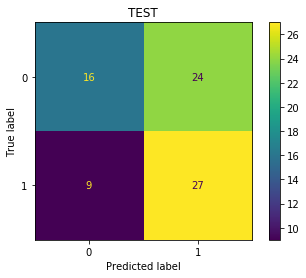

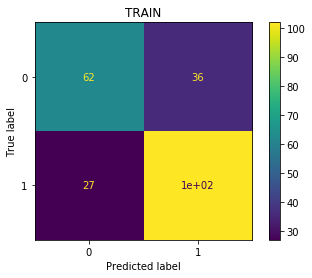

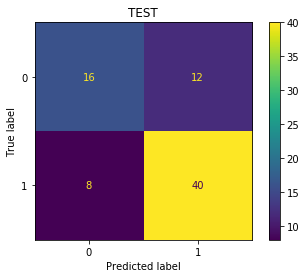

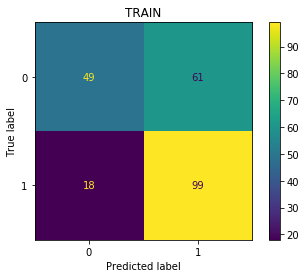

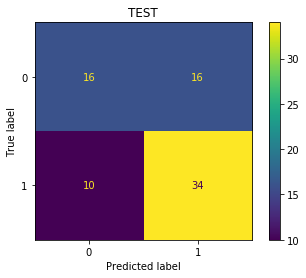

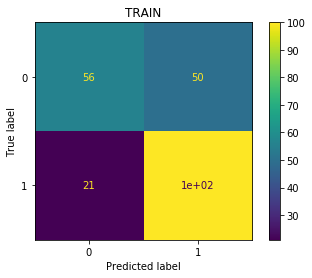

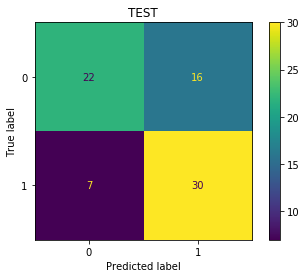

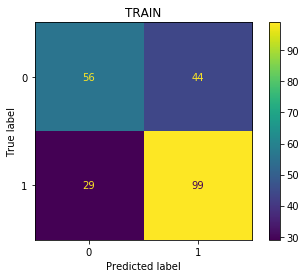

In [62]:
predictors = ["sex", "age", "restecg", "chol"]

X = heart[predictors]
y = heart["target"]

kf = KFold(4, shuffle = True)

acc_train = []
acc_test = []
depth = []
for train, test in kf.split(X):
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    X_train[["age", "chol"]] = z.fit_transform(X_train[["age", "chol"]])
    X_test[["age", "chol"]] = z.transform(X_test[["age", "chol"]])
    
    tree = DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 2)
    tree.fit(X_train,y_train)

    acc_test.append(tree.score(X_test,y_test))
    acc_train.append(tree.score(X_train,y_train))
    depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree,X_test,y_test)
    plt.title("TEST")
    plot_confusion_matrix(tree,X_train,y_train)
    plt.title("TRAIN")

print(acc_train)
print(np.mean(acc_train))
print(acc_test)
print(np.mean(acc_test))

print(depth)

# Regression Trees

Regression Trees are built in the same way as Decision Trees, but:

1. The output is continuous (like Linear Regression)
2. Instead of Gini Impurity/Entropy we can use things like the MSE, MAE, Sum of Squared Errors.
3. The prediction for each leaf node is the mean of the data points in that node, (rather than the mode)

In [63]:
wine = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/wineLARGE.csv")

wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
predictors = ["density", "fixed.acidity", "volatile.acidity", "residual.sugar"]

X = wine[predictors]
y = wine["alcohol"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))

# is it overfit?

tree = DecisionTreeRegressor(min_samples_leaf=10, max_depth = 3)
tree.fit(X_train,y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))


MSE TRAIN:  1.6302140123567846e-06
MSE TEST :  0.4423213141025641
MSE TRAIN:  0.5835868445063283
MSE TEST :  0.6329779649794357
